In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd

# Ganti path sesuai dengan lokasi dataset CSV di Google Drive Anda


data = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [66]:
#hapus kolom yang tidak penting untuk dipelajari model
data = data.drop(columns=['Tahun'])

In [67]:
#perintah untuk melakukan 'one hot encoding' pada dataframe dengan variabel kategorikal
data = pd.get_dummies(data)
data

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1329536.00,323589.00,1627.0,82.00,26.06,1,0,0,0,0,0,0,0
1,1299699.00,329041.00,1521.0,82.12,26.92,1,0,0,0,0,0,0,0
2,1382905.00,339253.00,1476.0,82.72,26.27,1,0,0,0,0,0,0,0
3,1419128.00,348223.00,1557.0,83.00,26.08,1,0,0,0,0,0,0,0
4,1368074.00,337561.00,1339.0,82.46,26.31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,3831923.00,390799.00,2317.6,79.40,26.45,0,0,0,1,0,0,0,0
220,4090654.00,396559.00,1825.1,77.04,26.36,0,0,0,1,0,0,0,0
221,2488641.91,511940.93,1385.8,76.05,25.50,0,0,0,1,0,0,0,0
222,2164089.33,464103.42,1706.4,78.03,27.23,0,0,0,1,0,0,0,0


In [68]:
# pisahkan atribut dan label
predictions = ['Produksi' , 'Luas Panen' , 'Curah hujan' , 'Kelembapan']
X = data[predictions]
y = data['Suhu rata-rata']

In [69]:

# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns = X.columns)
scaled_data.head()

,Produksi,Luas Panen,Curah hujan,Kelembapan
0,-0.302181,-0.218580,-0.801707,0.215970
1,-0.327929,-0.195103,-0.904653,0.240622
2,-0.256125,-0.151130,-0.948356,0.363882
3,-0.224866,-0.112504,-0.869690,0.421403
4,-0.268924,-0.158415,-1.081409,0.310469


In [70]:
from sklearn.model_selection import train_test_split

#bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)



In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

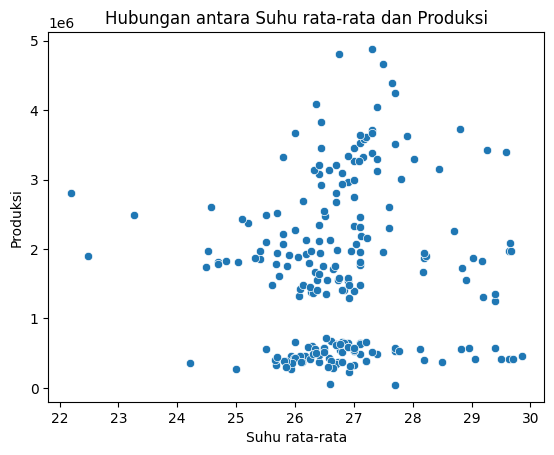

In [72]:
# Membuat scatter plot
sns.scatterplot(data, x="Suhu rata-rata", y="Produksi")

# Memberikan judul dan label sumbu
plt.title("Hubungan antara Suhu rata-rata dan Produksi")
plt.xlabel("Suhu rata-rata")
plt.ylabel("Produksi")

# Menampilkan plot
plt.show()

In [73]:
# Kolom label (variabel dependen)
x = data["Suhu rata-rata"]

# Kolom target (variabel independen)
y = data["Produksi"]

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

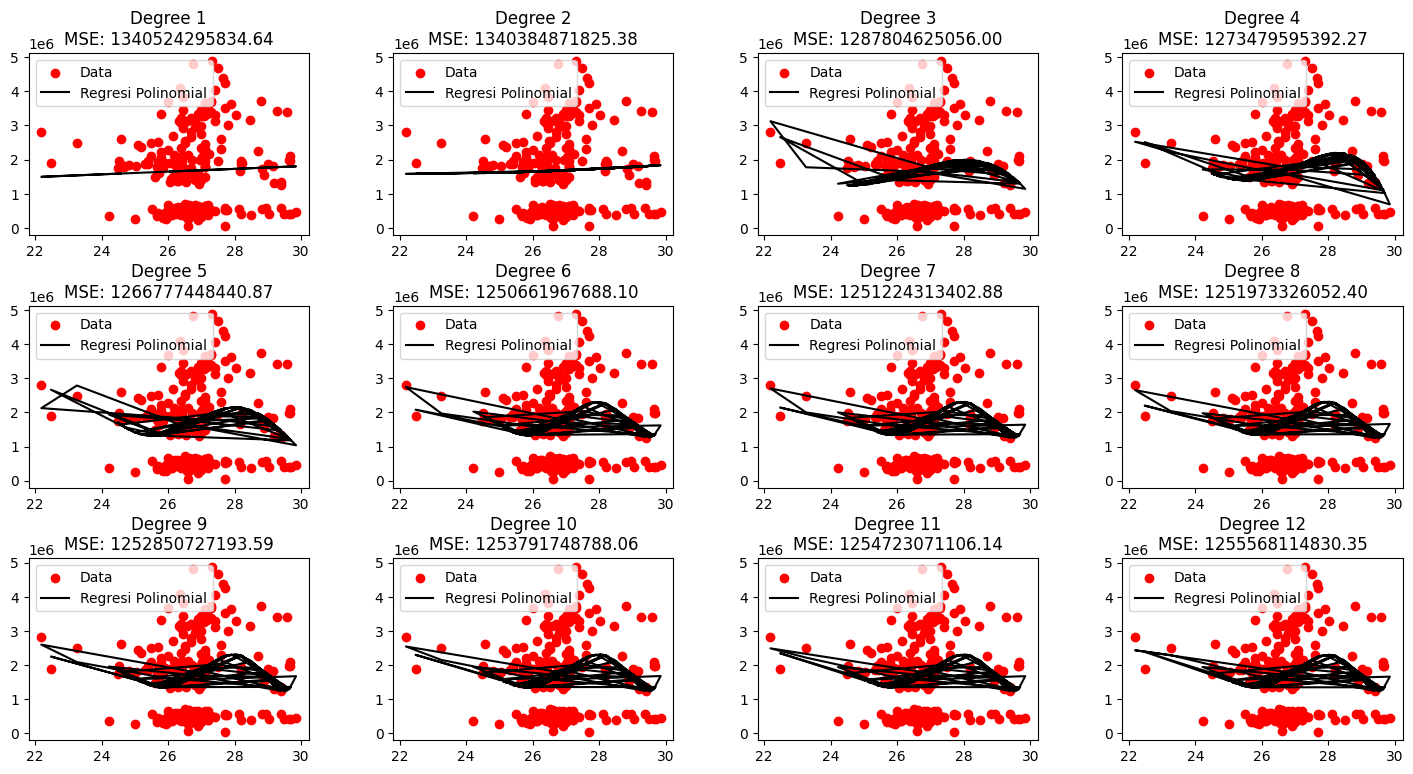

In [75]:
# Menginisialisasi array derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Membagi jendela gambar menjadi 2x4 subplot
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

# Menginisialisasi variabel untuk menyimpan nilai-nilai MSE
mse_values = []

for i, degree in enumerate(degrees):
    # Membuat objek PolynomialFeatures dengan derajat tertentu
    polynomial_features = PolynomialFeatures(degree=degree)

    # Mengubah fitur independen 'x' menjadi bentuk polinomial
    x_poly = polynomial_features.fit_transform(x.to_numpy().reshape(-1,1))

    # Melatih model regresi linier pada fitur polinomial
    model = LinearRegression()
    model.fit(x_poly, y)

    # Memprediksi hasil
    y_pred = model.predict(x_poly)

    # Menghitung MSE (Mean Squared Error)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    ax = axes[i // 4, i % 4]
    ax.scatter(x, y, label='Data', color='red')
    ax.plot(x, y_pred, color='black', label='Regresi Polinomial')
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.legend()

# Menampilkan plot
plt.show()

# Menampilkan MSE untuk setiap derajat
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')